# Objective


The main objective of this prediction is to build model which predicts whether a sms is a spam or not spam

# Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud

import re
import nltk
from nltk.stem import WordNetLemmatizer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score,precision_score,classification_report,confusion_matrix
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier

# Read the data

In [3]:
FILEPATH = '/home/seema/Downloads/spam.csv'

In [4]:
sms=pd.read_csv(FILEPATH, encoding ='ISO-8859-1')

In [5]:
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
sms.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 38 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   v1           5572 non-null   object
 1   v2           5571 non-null   object
 2   Unnamed: 2   255 non-null    object
 3   Unnamed: 3   167 non-null    object
 4   Unnamed: 4   32 non-null     object
 5   Unnamed: 5   23 non-null     object
 6   Unnamed: 6   10 non-null     object
 7   Unnamed: 7   10 non-null     object
 8   Unnamed: 8   5 non-null      object
 9   Unnamed: 9   4 non-null      object
 10  Unnamed: 10  4 non-null      object
 11  Unnamed: 11  1 non-null      object
 12  Unnamed: 12  1 non-null      object
 13  Unnamed: 13  1 non-null      object
 14  Unnamed: 14  1 non-null      object
 15  Unnamed: 15  1 non-null      object
 16  Unnamed: 16  1 non-null      object
 17  Unnamed: 17  1 non-null      object
 18  Unnamed: 18  1 non-null      object
 19  Unnamed: 19  1 non-null    

# EDA

In [8]:
# check nulls 
sms.isnull().sum()

v1                0
v2                1
Unnamed: 2     5317
Unnamed: 3     5405
Unnamed: 4     5540
Unnamed: 5     5549
Unnamed: 6     5562
Unnamed: 7     5562
Unnamed: 8     5567
Unnamed: 9     5568
Unnamed: 10    5568
Unnamed: 11    5571
Unnamed: 12    5571
Unnamed: 13    5571
Unnamed: 14    5571
Unnamed: 15    5571
Unnamed: 16    5571
Unnamed: 17    5571
Unnamed: 18    5571
Unnamed: 19    5571
Unnamed: 20    5571
Unnamed: 21    5571
Unnamed: 22    5571
Unnamed: 23    5571
Unnamed: 24    5571
Unnamed: 25    5571
Unnamed: 26    5571
Unnamed: 27    5571
Unnamed: 28    5571
Unnamed: 29    5571
Unnamed: 30    5571
Unnamed: 31    5571
Unnamed: 32    5571
Unnamed: 33    5571
Unnamed: 34    5571
Unnamed: 35    5571
Unnamed: 36    5571
Unnamed: 37    5571
dtype: int64

After checking nulls we can see that only 2 variable are relevant and others are irrelevant

In [9]:
sms=sms[['v1','v2']]

In [10]:
sms.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#In relevent variable only one null is there ,so we dropp that null
sms=sms.dropna(axis=0)

In [12]:
sms.isnull().sum()

v1    0
v2    0
dtype: int64

In [13]:
#renameing the columns name
sms.rename(columns={'v1':'label','v2':'text'},inplace = True)

In [14]:
sms.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
sms['length']=sms['text'].apply(len)


In [16]:
#counting the number of words
sms['num_words'] = sms['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [17]:
#counting the number of sentence 
sms['num_sent'] = sms['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [18]:
sms.head()

,label,text,length,num_words,num_sent
0,ham,"Go until jurong point, crazy.. Available only ...",111,23,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [19]:
sms.tail()

,label,text,length,num_words,num_sent
5567,spam,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,ham,Will Ì_ b going to esplanade fr home?,37,9,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,ham,The guy did some bitching but I acted like i'd...,125,27,1
5571,ham,Rofl. Its true to its name,26,7,2


In [20]:
# check the diminesion of dataset
sms.shape

(5571, 5)

In [21]:
# check the datatype of data
sms.dtypes

label        object
text         object
length        int64
num_words     int64
num_sent      int64
dtype: object

In [22]:
sms.reset_index(inplace=True)

In [23]:
#remove old index column
sms.drop("index",axis=1,inplace=True)

# Data Visualization

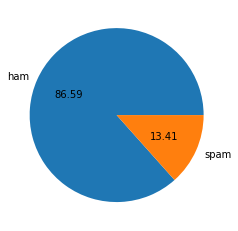

In [24]:
plt.pie(sms["label"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [25]:
text = str(sms.loc[sms['label'] == 'ham', 'text'])

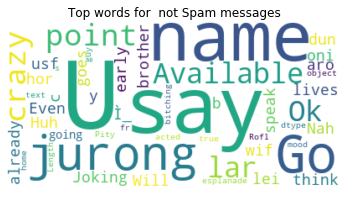

In [26]:
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Top words for  not Spam messages')
plt.axis("off")
plt.show()

In [27]:
text1 = str(sms.loc[sms['label'] == 'spam', 'text'])

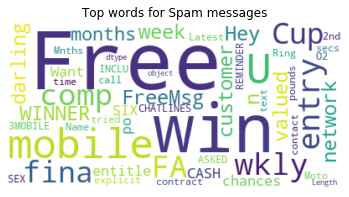

In [28]:
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(text1)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Top words for Spam messages')
plt.axis("off")
plt.show()

In [29]:
sms.head(10)

,label,text,length,num_words,num_sent
0,ham,"Go until jurong point, crazy.. Available only ...",111,23,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
6,ham,Even my brother is not like to speak with me. ...,77,18,2
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,30,2
8,spam,WINNER!! As a valued network customer you have...,158,32,5
9,spam,Had your mobile 11 months or more? U R entitle...,154,31,3


In [30]:
sms_clean=sms.copy()

# Data preprocessing

In [31]:
# removing punctuation and numbers from text data
lem=nltk.WordNetLemmatizer()

corpus=[]

for i in range(sms_clean.shape[0]):
    review=re.sub('[^a-zA-Z]',' ',str(sms_clean['text'][i]))
    review=review.lower()
    corpus.append(review)

In [32]:
sms_clean['clean_text']=corpus
sms_clean.head()

,label,text,length,num_words,num_sent,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,23,2,go until jurong point crazy available only ...
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i don t think he goes to usf he lives aro...


# remove stop words and create other variable

In [33]:
stop_words= set(stopwords.words('english'))

def clean_txt(text):
    text=" ".join(word for word in text.split()if word not in stop_words)
    return text

In [34]:
sms_clean['clean_text1']=sms_clean['clean_text'].apply(clean_txt)

In [35]:
sms_clean.head()

,label,text,length,num_words,num_sent,clean_text,clean_text1
0,ham,"Go until jurong point, crazy.. Available only ...",111,23,2,go until jurong point crazy available only ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in a wkly comp to win fa cup fina...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor u c already then say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i don t think he goes to usf he lives aro...,nah think goes usf lives around though


# Remove stemming words from Portstemmer

In [36]:
porter = PorterStemmer()
def stemSentence(clean_txt1):
    token_words=word_tokenize(clean_txt1)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

In [37]:
sms_clean['final_clean_text']=sms_clean['clean_text1'].apply(stemSentence)

In [38]:
sms_clean.head()

,label,text,length,num_words,num_sent,clean_text,clean_text1,final_clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,23,2,go until jurong point crazy available only ...,go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in a wkly comp to win fa cup fina...,free entry wkly comp win fa cup final tkts st ...,free entri wkli comp win fa cup final tkt st m...
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor u c already then say,u dun say early hor u c already say,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i don t think he goes to usf he lives aro...,nah think goes usf lives around though,nah think goe usf live around though


In [39]:
# Use clean text for model building
x=sms_clean['final_clean_text']
y=sms_clean['label']

# use CountVectorizer to convert text vaiable into matrix form

In [40]:
cvec=CountVectorizer()
cvdf=cvec.fit(x)

In [41]:
vocab=cvdf.vocabulary_

In [42]:
print('vocabulary :',vocab)

vocabulary : {'go': 2116, 'jurong': 2741, 'point': 3966, 'crazi': 1146, 'avail': 365, 'bugi': 718, 'great': 2187, 'world': 5948, 'la': 2839, 'buffet': 716, 'cine': 941, 'got': 2151, 'amor': 182, 'wat': 5774, 'ok': 3643, 'lar': 2866, 'joke': 2709, 'wif': 5870, 'oni': 3665, 'free': 1960, 'entri': 1636, 'wkli': 5914, 'comp': 1035, 'win': 5881, 'fa': 1752, 'cup': 1196, 'final': 1849, 'tkt': 5368, 'st': 4945, 'may': 3172, 'text': 5255, 'receiv': 4261, 'question': 4181, 'std': 4972, 'txt': 5522, 'rate': 4224, 'appli': 253, 'dun': 1516, 'say': 4500, 'earli': 1533, 'hor': 2407, 'alreadi': 156, 'nah': 3422, 'think': 5301, 'goe': 2120, 'usf': 5635, 'live': 2973, 'around': 292, 'though': 5318, 'freemsg': 1966, 'hey': 2342, 'darl': 1243, 'week': 5807, 'word': 5942, 'back': 400, 'like': 2946, 'fun': 2006, 'still': 4993, 'tb': 5202, 'xxx': 6015, 'chg': 899, 'send': 4569, 'rcv': 4235, 'even': 1684, 'brother': 692, 'speak': 4879, 'treat': 5466, 'aid': 111, 'patent': 3813, 'per': 3849, 'request': 4331,

In [43]:
cvdf=cvdf.transform(x).toarray()

In [44]:
cvdf

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Split the data into train and test

In [231]:
x_train,x_test,y_train,y_test=train_test_split(cvdf,y,test_size=0.2,random_state=100)

# Model Building

# Naive bayes

In [232]:
model_naive=MultinomialNB().fit(x_train,y_train)

In [233]:
# predict
p_naive=model_naive.predict(x_test)

In [52]:
#confusion matrix ans classification report
df=pd.DataFrame({'actual':y_test,'pred':p_naive})
print(pd.crosstab(df.actual,df.pred,margins=True))
print(classification_report(y_test,p_naive))
print('model accuracy ={}'.format(accuracy_score(y_test,p_naive)))

pred    ham  spam   All
actual                 
ham     960    16   976
spam      8   131   139
All     968   147  1115
              precision    recall  f1-score   support

         ham       0.99      0.98      0.99       976
        spam       0.89      0.94      0.92       139

    accuracy                           0.98      1115
   macro avg       0.94      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115

model accuracy =0.97847533632287


In [237]:
precision_naive=precision_score(y_test,p_naive,average="binary", pos_label="spam")*100

In [238]:
precision_naive

89.1156462585034

In [239]:
accurcy_naive=accuracy_score(y_test,p_naive)*100

In [240]:
accurcy_naive

97.847533632287

# KNN

In [241]:
# cross-validation to determine the best K
cv_accuracy = []

n_list = np.arange(3,12,2); n_list

for n in n_list:
    model = neighbors.KNeighborsClassifier(n_neighbors=n)
    scores = cross_val_score(model,x_train,y_train,cv=4,scoring='accuracy')
    cv_accuracy.append(scores.mean() )

print(cv_accuracy)  

[0.9230251346499103, 0.9088868940754039, 0.8999102333931777, 0.8898114901256733, 0.882854578096948]


In [242]:
bestK = n_list[cv_accuracy.index(max(cv_accuracy))]
print("best K = ", bestK)

best K =  3


In [243]:
model_knn = neighbors.KNeighborsClassifier(n_neighbors=bestK,metric = "manhattan").fit(x_train,y_train)

In [244]:
p_knn = model_knn.predict(x_test)

In [245]:
#confusion matrix ans classification report
df=pd.DataFrame({'actual':y_test,'pred':p_knn})
print(pd.crosstab(df.actual,df.pred,margins=True))
print(classification_report(y_test,p_knn))
print('model accuracy ={}'.format(accuracy_score(y_test,p_knn)))

pred     ham  spam   All
actual                  
ham      975     1   976
spam      68    71   139
All     1043    72  1115
              precision    recall  f1-score   support

         ham       0.93      1.00      0.97       976
        spam       0.99      0.51      0.67       139

    accuracy                           0.94      1115
   macro avg       0.96      0.75      0.82      1115
weighted avg       0.94      0.94      0.93      1115

model accuracy =0.9381165919282511


In [62]:
precision_knn=precision_score(y_test,p_knn,average="binary", pos_label="spam")*100

In [63]:
precision_knn

98.61111111111111

In [64]:
accurcy_knn=accuracy_score(y_test,p_knn)*100

In [65]:
accurcy_knn

93.81165919282512

# Random Forest

In [66]:
model_rf=RandomForestClassifier(n_estimators=50,max_features=1,).fit(x_train,y_train)

In [67]:
# predict
p_rf=model_rf.predict(x_test)

In [68]:
#confusion matrix ans classification report
df=pd.DataFrame({'actual':y_test,'pred':p_rf})
print(pd.crosstab(df.actual,df.pred,margins=True))
print(classification_report(y_test,p_rf))
print('model accuracy ={}'.format(accuracy_score(y_test,p_rf)))

pred     ham  spam   All
actual                  
ham      976     0   976
spam      29   110   139
All     1005   110  1115
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       976
        spam       1.00      0.79      0.88       139

    accuracy                           0.97      1115
   macro avg       0.99      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115

model accuracy =0.9739910313901345


In [70]:
precision_rf=precision_score(y_test,p_rf,average="binary", pos_label="spam")*100

In [71]:
precision_rf

100.0

In [72]:
accurcy_rf=accuracy_score(y_test,p_rf)*100

In [73]:
accurcy_rf

97.39910313901345

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
# create an instance of the decision tree classifier class
dtclf=DecisionTreeClassifier()    

In [76]:
params={'criterion':['gini','entropy'],
       'max_depth':np.arange(2,4),
       'min_samples_leaf':np.arange(2,4),
       'min_samples_split':np.arange(2,4) }

In [77]:
from sklearn.model_selection import GridSearchCV 

In [78]:
grid=GridSearchCV(dtclf,param_grid=params,scoring='accuracy',
                  cv=3,n_jobs=-1).fit(x_train,y_train)

In [79]:
# check for the combination of param that give best accuracy
grid.best_params_, grid.best_score_


({'criterion': 'gini',
  'max_depth': 3,
  'min_samples_leaf': 2,
  'min_samples_split': 2},
 0.9216796346899532)

In [81]:
# build model using the grid search  result for best params
model_dt=DecisionTreeClassifier(criterion='gini', max_depth=3,min_samples_leaf=2,min_samples_split=2).fit(x_train,y_train)

In [82]:
# predict
p_dt=model_dt.predict(x_test)

In [83]:
#confusion matrix ans classification report
df=pd.DataFrame({'actual':y_test,'pred':p_dt})
print(pd.crosstab(df.actual,df.pred,margins=True))
print(classification_report(y_test,p_dt))
print('model accuracy ={}'.format(accuracy_score(y_test,p_dt)))

pred    ham  spam   All
actual                 
ham     924    52   976
spam     39   100   139
All     963   152  1115
              precision    recall  f1-score   support

         ham       0.96      0.95      0.95       976
        spam       0.66      0.72      0.69       139

    accuracy                           0.92      1115
   macro avg       0.81      0.83      0.82      1115
weighted avg       0.92      0.92      0.92      1115

model accuracy =0.9183856502242153


In [85]:
precision_dt=precision_score(y_test,p_dt,average="binary", pos_label="spam")*100

In [267]:
precision_dt

65.78947368421053

In [87]:
accurcy_dt=accuracy_score(y_test,p_dt)*100

In [88]:
accurcy_dt

91.83856502242152

# Logistic Regression

In [89]:
model_logr= LogisticRegression().fit(x_train,y_train)

In [90]:
p5=model_logr.predict(x_test)

In [91]:
#confusion matrix ans classification report
df=pd.DataFrame({'actual':y_test,'pred':p5})
print(pd.crosstab(df.actual,df.pred,margins=True))
print(classification_report(y_test,p5))
print('model accuracy ={}'.format(accuracy_score(y_test,p5)))

pred    ham  spam   All
actual                 
ham     975     1   976
spam     14   125   139
All     989   126  1115
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       976
        spam       0.99      0.90      0.94       139

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115

model accuracy =0.9865470852017937


In [94]:
precision_Logr=precision_score(y_test,p5,average="binary", pos_label="spam")*100

In [95]:
precision_Logr

99.20634920634922

In [96]:
accurcy_logr=accuracy_score(y_test,p5)*100

In [97]:
accurcy_logr

98.65470852017937

# Model building using TF-idf

In [289]:
x=sms_clean['final_clean_text']
y=sms_clean['label']

In [290]:
tf_idf = TfidfVectorizer()

In [291]:
X_tf = tf_idf.fit_transform(x).toarray()

In [292]:
x1_train,x1_test,y1_train,y1_test=train_test_split(X_tf,y,test_size=0.2,random_state=121)

In [293]:
model_tf_idf=MultinomialNB().fit(x1_train,y1_train)

In [294]:
p_tf_idf=model_tf_idf.predict(x1_test)

In [295]:
#confusion matrix ans classification report
df=pd.DataFrame({'actual':y1_test,'pred':p_tf_idf})
print(pd.crosstab(df.actual,df.pred,margins=True))
print(classification_report(y1_test,p_tf_idf))
print('model accuracy ={}'.format(accuracy_score(y1_test,p_tf_idf)))

pred     ham  spam   All
actual                  
ham      972     0   972
spam      36   107   143
All     1008   107  1115
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       972
        spam       1.00      0.75      0.86       143

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.97      1115

model accuracy =0.967713004484305


In [296]:
precision__tf_idf=precision_score(y_test,p_tf_idf,average="binary", pos_label="spam")*100

In [297]:
precision__tf_idf

10.2803738317757

In [298]:
accurcy_tf_idf=accuracy_score(y_test,p_tf_idf)*100

In [299]:
accurcy_tf_idf

79.91031390134529

# Model Performance Evaluation report

In [287]:
sms_report=pd.DataFrame({'Algorithm':['DecisionTree','RandomForest','KNN','LogisticRegression','NaiveBayes','NaiveBayes_tfdf'],
                                      'Accuracy_score':[accurcy_dt,accurcy_rf,accurcy_knn,accurcy_logr,accurcy_naive,accurcy_tf_idf],
                                      'Precision_score':[precision_dt,precision_rf,precision_knn,precision_Logr,precision_naive,precision__tf_idf] })


In [288]:
sms_report

,Algorithm,Accuracy_score,Precision_score
0,DecisionTree,91.838565,65.789474
1,RandomForest,97.399103,100.000000
2,KNN,93.811659,98.611111
3,LogisticRegression,98.654709,99.206349
4,NaiveBayes,97.847534,89.115646
5,NaiveBayes_tfdf,79.910314,10.280374


# Conclusion